# Data preparation home assignment

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Loading the data into a pandas data frame

In [228]:
df = pd.read_csv('customers.csv')

# 2 - Inspecting the data set using three different methods:
    .info() : shows all the details about the data set variables (columns)
    .describe() : shows the statistical information for the numerical values
    .head() : useful for quickly testing if our object has the right type of data in it

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8068 non-null   int64  
 1   CustomerID      8068 non-null   int64  
 2   Gender          8068 non-null   object 
 3   Married         7928 non-null   object 
 4   Age             8068 non-null   int64  
 5   Graduated       7990 non-null   object 
 6   Profession      7944 non-null   object 
 7   WorkExperience  7239 non-null   float64
 8   SpendingScore   8068 non-null   object 
 9   FamilySize      7733 non-null   float64
 10  Segmentation    8068 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 504.3+ KB


In [230]:
df.describe()

,Unnamed: 0,CustomerID,Age,WorkExperience,FamilySize
count,8068.000000,8068.000000,8068.000000,7239.000000,7733.000000
mean,4033.500000,463479.214551,43.466906,2.641663,2.850123
std,2329.175319,2595.381232,16.711696,3.406763,1.531413
min,0.000000,458982.000000,18.000000,0.000000,1.000000
25%,2016.750000,461240.750000,30.000000,0.000000,2.000000
50%,4033.500000,463472.500000,40.000000,1.000000,3.000000
75%,6050.250000,465744.250000,53.000000,4.000000,4.000000
max,8067.000000,467974.000000,89.000000,14.000000,9.000000


In [231]:
df.head()

,Unnamed: 0,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Segmentation
0,0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


# 3 - Cleaning Data

### 3-1 After exploring the data, first we drop the columns that are not necessary for our analysis

In [232]:
df = df.drop(['Unnamed: 0', 'CustomerID'], axis=1)

### 3-2 Then we check the missing values

In [233]:
df.isnull().sum()

Gender              0
Married           140
Age                 0
Graduated          78
Profession        124
WorkExperience    829
SpendingScore       0
FamilySize        335
Segmentation        0
dtype: int64

### 3-3 Next step is to handle and fill/drop the missing values with proper methods

- For our categorical variables that are the df['Married'], df['Graduated'] and df['Profession'] columns, we need to respectively fill/clean the 140,78,124 empty observations and i decided not to drop empty rows because it may cause the loss of data,on the other hand because these are categorical variables and the percentage of missing ones is not that much (140/8068 = 0.01 only 1 percent for the Married,78/8068 = 0.009 even less than 1 percent for the Graduated,124/8068 = 0.015 1.5 percent for the profession) i decided to fill the missing values with the mode (most frequent value)

In [234]:
columns = ['Married', 'Graduated', 'Profession']
for column in columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0])

- For the work experince which is a numerical value and approximately more than ten percent (829 / 8068 = 0.102) of values are missing, so filling with zeros won't be a good option because we will face lots of zero values, so we can fill the missing ones with the mean or forward/backward method, to do so, i will create two new columns outside of the data set and compare the histogram for those and decide which one to use:
    

<AxesSubplot:ylabel='Frequency'>

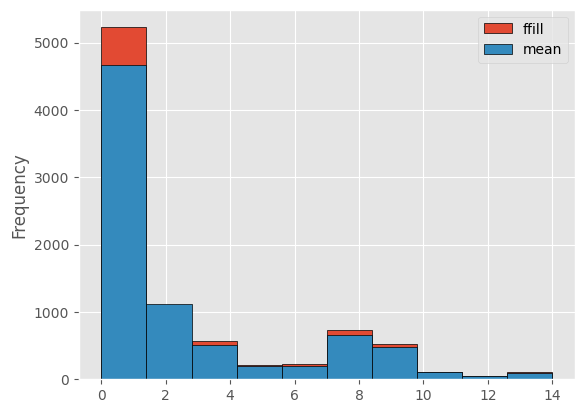

In [235]:
df_ffill = df.copy(deep = True)
df_ffill['WorkExperience'].fillna(method = "ffill", inplace = True)

df_mean = df.copy(deep = True)
df_mean['WorkExperience'].fillna(df_mean['WorkExperience'].mean(), inplace = True)


result = pd.DataFrame(df_ffill['WorkExperience'].values,columns=['ffill'])
result['mean'] = df_mean['WorkExperience'].values

result.plot.hist(edgecolor='black')

- As we can see the fowrard filling method in this case presents lots of values in the first bin and mean filling provides a well distribution through all our bins and is a roper method for us to fill our missig values

In [236]:
df['WorkExperience'].fillna(df['WorkExperience'].mean(),inplace=True)

- Last column that should be filled is the family size and we must do a similar process that we did for the work experience

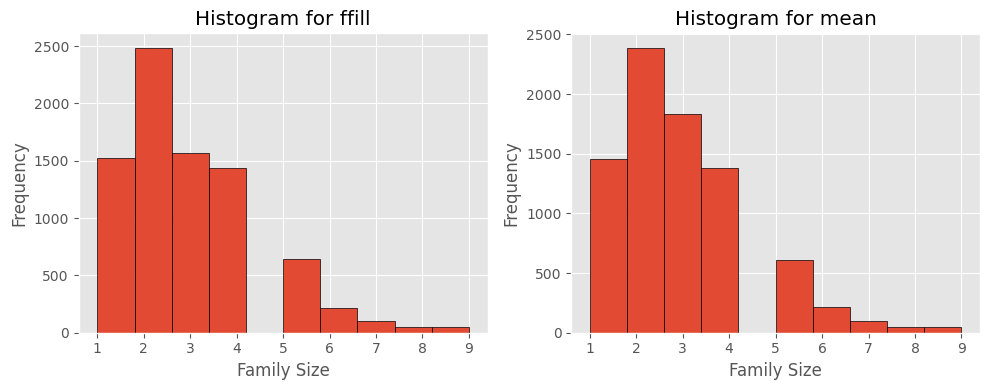

In [237]:
df_ffill = df.copy(deep = True)
df_ffill['FamilySize'].fillna(method = "ffill", inplace = True)

df_mean = df.copy(deep = True)
df_mean['FamilySize'].fillna(df_mean['FamilySize'].mean(), inplace = True)


result = pd.DataFrame(df_ffill['FamilySize'].values,columns=['ffill'])
result['mean'] = df_mean['FamilySize'].values

# In this case we will plot the histograms separately to have a better vision
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(result['ffill'], bins=10, edgecolor='black')
ax1.set_xlabel('Family Size')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram for ffill')

ax2.hist(result['mean'], bins=10, edgecolor='black')
ax2.set_xlabel('Family Size')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram for mean')

plt.tight_layout()

plt.show()

- as we can see there is no such huge difference bwetween them and we will use the forward filling because the difference between family sizes of 1 and 3 and 4 is slightly less

In [238]:
df['FamilySize'].fillna(method = "ffill", inplace = True)

### 3-4 Handling outliers, Outliers are data points which are outside the normal range of a typical observation, Categorical variables do not have outliers in the traditional sense because they represent distinct categories or groups. Outliers are typically associated with continuous or numeric variables, where extreme values deviate significantly from the rest of the data, first we make a list of our numerical variables:

In [239]:
numerical_variables = df.select_dtypes(include='number')

- then we plot the boxplots for these variables

Text(0, 0.5, 'Values')

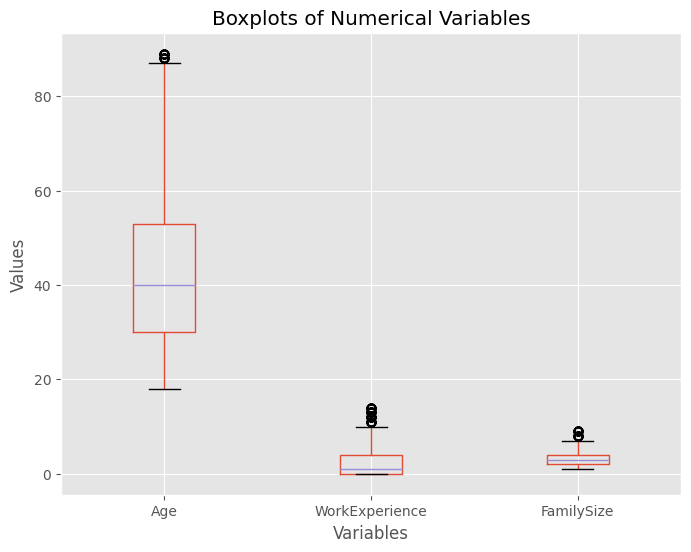

In [240]:
plt.figure(figsize=(8, 6))
numerical_variables.boxplot()
plt.title('Boxplots of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

- Of course at the first look we realize there are outliers in our dataset, but we have to consider that some outliers represent natural variations in the population, and they should be left as are in our dataset. These are called true outliers. Other outliers are problematic and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling. Here firstly because we have no calculations and measurements based on these variables and these variables have no effect in our data, secondly if we take a look at our WorkExperience histogram we will see that a large portion (4000-5000) of our obsevations are considered as outliers and deleting them will cause a big loss in our data,therefore we will keep the outliers.

# 4 - Data has been prepared to do the exploratory analysis

- We can see there are no more missing values and we dropped the columns that are not interesting for our analysis

In [241]:
df.isnull().sum()

Gender            0
Married           0
Age               0
Graduated         0
Profession        0
WorkExperience    0
SpendingScore     0
FamilySize        0
Segmentation      0
dtype: int64

In [242]:
df.head()

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,A


### 4-1 First we plot pie charts for all the categorical variables through the whole population of our dataset to have a basic understanding of our dataset

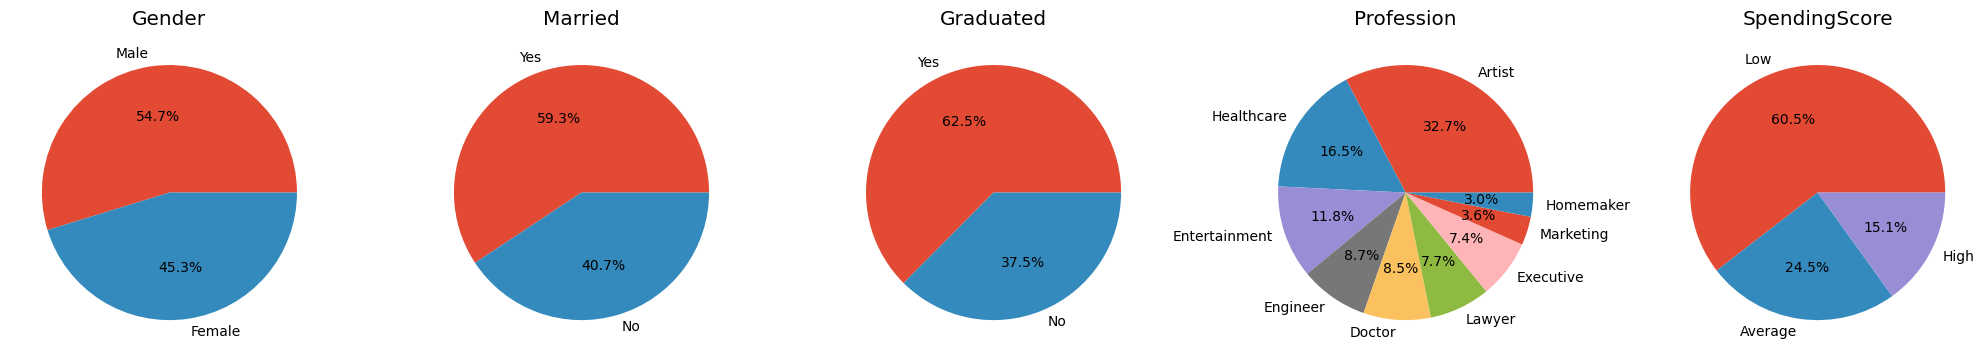

In [243]:
categorical_vars = ['Gender', 'Married', 'Graduated', 'Profession' , 'SpendingScore']
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
axs = axs.flatten()
for i, var in enumerate(categorical_vars):
    category_counts = df[var].value_counts()
    if len(category_counts) > 0 and not category_counts.isnull().all():
        labels = category_counts.index
        sizes = category_counts.values
        axs[i].pie(sizes, labels=labels, autopct='%1.1f%%')
        axs[i].set_title(var)

fig.tight_layout()
plt.show()

### 4-2 Then for exploring the percentage of male and females which are married or single we can make a pivot table and then visualize that data with the help of a bar chart

In [244]:
pivot_gender_and_marital = pd.pivot_table(df,index='Married',columns='Gender',aggfunc='size', fill_value=0)
display(pivot_gender_and_marital)

Gender,Female,Male
Married,,
No,1707,1578
Yes,1944,2839


- Now we can illustrate the bar chart:

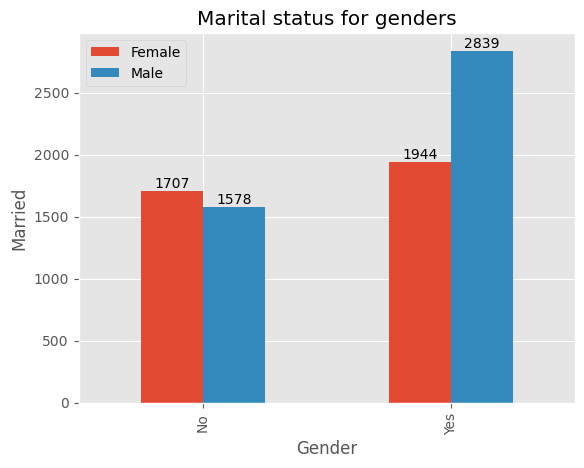

In [245]:
fig, ax = plt.subplots()
pivot_gender_and_marital.plot(kind='bar',ax=ax)
plt.xlabel('Gender')
plt.ylabel('Married')
plt.title('Marital status for genders')
for numbers in ax.containers:
    ax.bar_label(numbers)
plt.legend()
plt.show()

- Most of the customers are married males and then married females, so generally speaking married ones are the majority of our customers.

### 4-3 Here i create a new column to show the different age groups

In [246]:
age_bins = [18, 27, 36, 45, 54, 63, 72, 81, 90]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=False, right=False)
age_group_counts = df['Age Group'].value_counts().sort_index()

- Ploting the histograms for different age groups and how many of people in each group we have

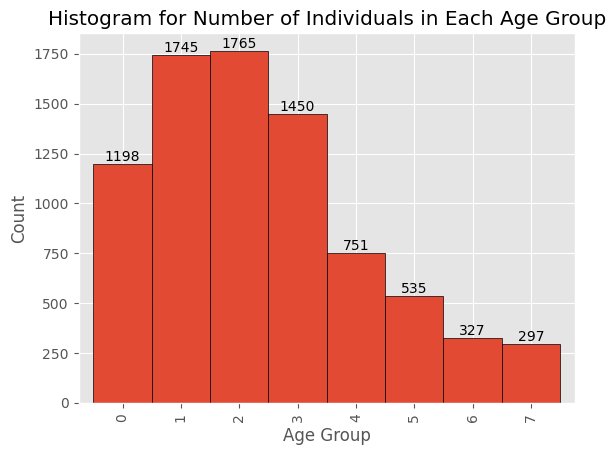

In [247]:
fig, ax = plt.subplots()
age_group_counts.plot(kind='bar', ax=ax, width = 1.0, edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Histogram for Number of Individuals in Each Age Group')
# Adding data lables
for Data in ax.containers:
    ax.bar_label(Data)
plt.xticks(ticks=range(len(age_group_counts.index)), labels=age_group_counts.index)
plt.show()

### 4-4 We have ploted a pie chart for showing the percantage distribution of each profession before,but we can also plot a histogram to show exact number number of customers with different professions

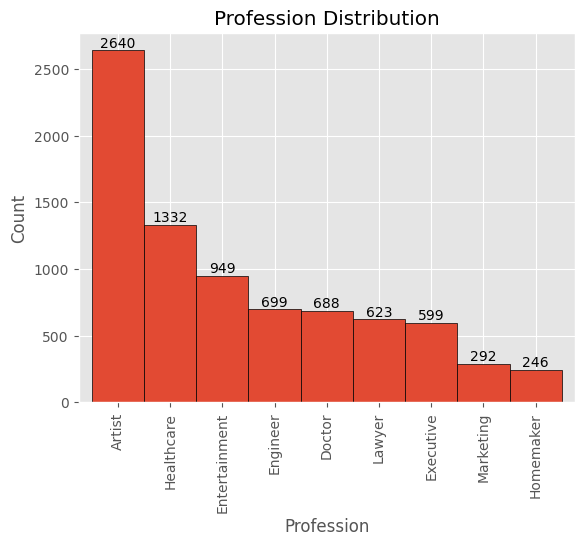

In [248]:
num_of_prof = df['Profession'].value_counts()
fig, ax = plt.subplots()
num_of_prof.plot(kind='bar', ax=ax, width=1.0, edgecolor='black')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Profession Distribution')
for data in ax.containers:
    ax.bar_label(data)
plt.show()

- Artists are majority of our customers.

### 4-5 We can also see the distribution and number of families with different sizes through our population

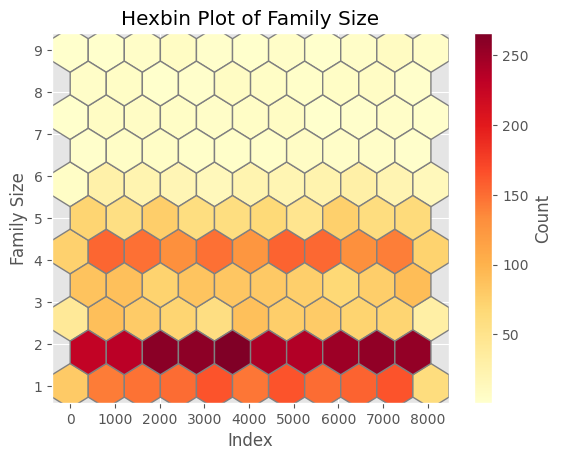

In [249]:
plt.hexbin(df.index, df['FamilySize'], gridsize=10, cmap='YlOrRd', edgecolors='grey')
plt.xlabel('Index')
plt.ylabel('Family Size')
plt.title('Hexbin Plot of Family Size')
plt.colorbar(label='Count')
plt.show()

### 4-6 Another useful and meaningful visualization could be the number of each individual with particular work experience

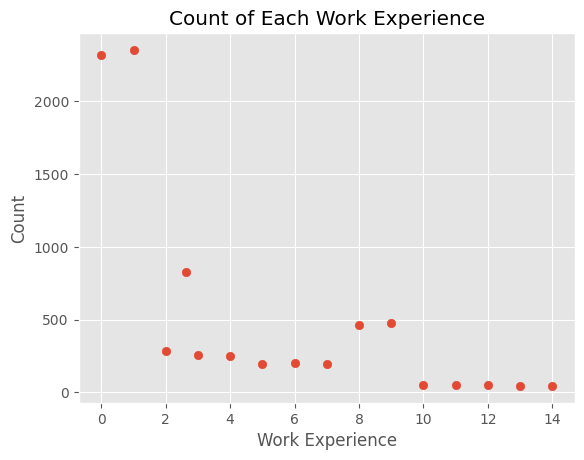

In [250]:
work_experience_counts = df['WorkExperience'].value_counts()
plt.scatter(work_experience_counts.index, work_experience_counts.values)
plt.xlabel('Work Experience')
plt.ylabel('Count')
plt.title('Count of Each Work Experience')
plt.show()

- Again here we can see more than 4000 of observations are with zero or less than two years of experience and it shows that these are true outliers or natural variationes and it is not a good idea to drop the values of these observations.

### 4-7 Correlation is a statistical measure that quantifies the relationship between two variables. It indicates how changes in one variable are associated with changes in another variable. Correlation is used to determine the degree to which two variables are linearly related.

In [251]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_columns.corr()
correlation

,Age,WorkExperience,FamilySize
Age,1.000000,-0.179361,-0.267002
WorkExperience,-0.179361,1.000000,-0.055671
FamilySize,-0.267002,-0.055671,1.000000


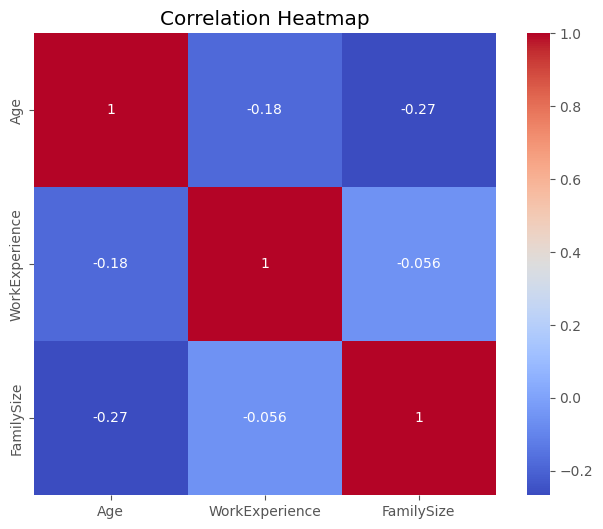

In [252]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

-  It is important to note that correlation does not imply causation. Just because two variables are correlated does not mean that one variable causes the other to change.

# 5 - Now we go through the segmentations, We don't have any data about how this segmentations are being executed, but it is interesting for us to analyze the data considering this segmentations

### 5-1 Number of customers in each segment

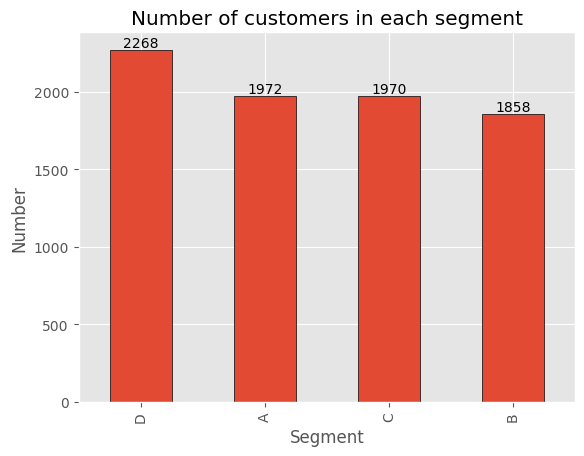

In [253]:
seg_count = df['Segmentation'].value_counts()
ax = seg_count.plot.bar(edgecolor='black')
for i, count in enumerate(seg_count):
    ax.annotate(str(count), (i, count), ha='center', va='bottom')
plt.xlabel('Segment')
plt.ylabel('Number')
plt.title('Number of customers in each segment')
plt.show()

- The most populated segment is D with  2268 observations and the least populated one is segment B with 1858

### 5-2 Number of Graduated and non graduated ones for each segment

In [254]:
pivot_table_graduateds = df.pivot_table(df,index='Graduated',columns='Segmentation',aggfunc='size', fill_value=0)
pivot_table_graduateds

Segmentation,A,B,C,D
Graduated,,,,
No,729,508,348,1437
Yes,1243,1350,1622,831


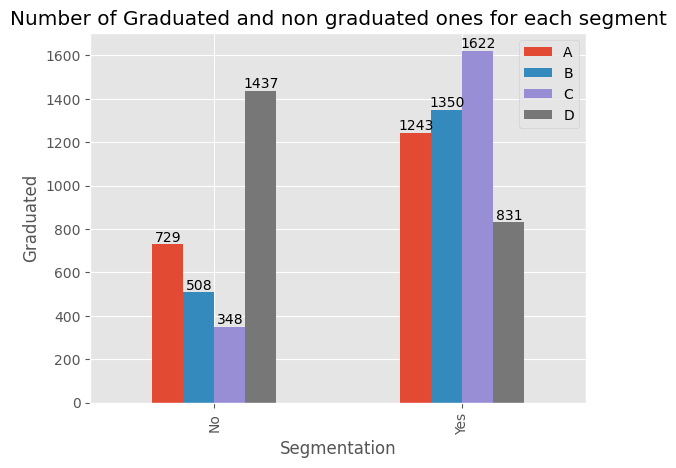

In [255]:
fig, ax = plt.subplots()
pivot_table_graduateds.plot(kind='bar',ax=ax)
plt.xlabel('Segmentation')
plt.ylabel('Graduated')
plt.title('Number of Graduated and non graduated ones for each segment')
for numbers in ax.containers:
    ax.bar_label(numbers)
plt.legend()
plt.show()

- Most non-graduateds and least graduateds belong to the segment D and Most graduateds and least non-graduateds belong to the segment C

### 5-3 Number of customers grouped by Spending score for each segment

In [256]:
pivot_table_spending_score = df.pivot_table(df,index='SpendingScore',columns='Segmentation',aggfunc='size', fill_value=0)
pivot_table_spending_score

Segmentation,A,B,C,D
SpendingScore,,,,
Average,343,590,903,138
High,271,384,405,156
Low,1358,884,662,1974


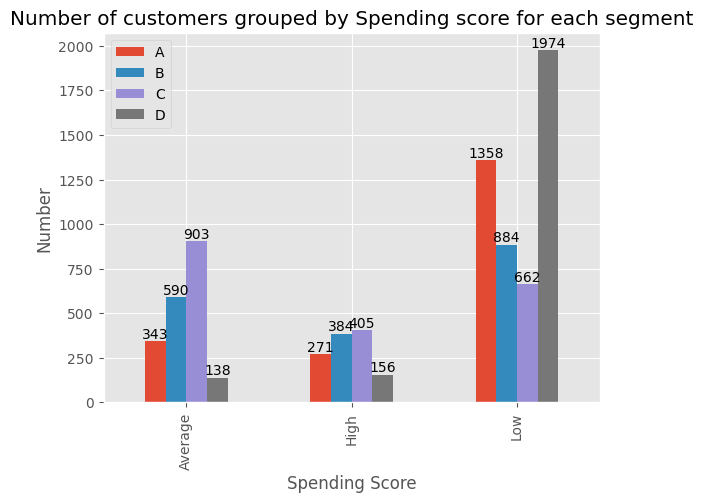

In [257]:
fig, ax = plt.subplots()
pivot_table_spending_score.plot(kind='bar',ax=ax)
plt.xlabel('Spending Score')
plt.ylabel('Number')
plt.title('Number of customers grouped by Spending score for each segment')
for numbers in ax.containers:
    ax.bar_label(numbers)
plt.legend()
plt.show()

- Most Number of customers with low spending experience and least number of poepole with high and average spending sore belongs to segment D and most Number of poepole with high spending experience and least number of poepole with low and average spending sore belongs to segment C

### 5-4 Average of work experience in each segmentation

In [258]:
pivot_table_work_experience = df.pivot_table(index='Segmentation',values='WorkExperience',aggfunc='mean', fill_value=0)
pivot_table_work_experience

,WorkExperience
Segmentation,
A,2.851665
B,2.405382
C,2.272314
D,2.973456


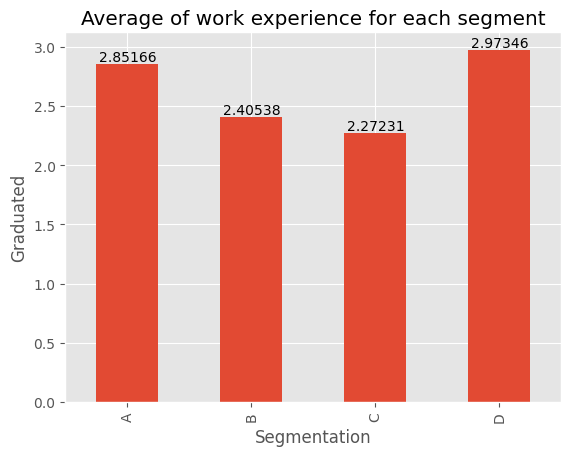

In [259]:
fig, ax = plt.subplots()
pivot_table_work_experience.plot(kind='bar',ax=ax)
plt.xlabel('Segmentation')
plt.ylabel('Graduated')
plt.title('Average of work experience for each segment')
for numbers in ax.containers:
    ax.bar_label(numbers)
ax.legend().remove()
plt.show()

In [260]:
pivot_table_work_exp_mode = df.pivot_table(index='Segmentation', values='WorkExperience', aggfunc=lambda x: x.mode().values[0])
pivot_table_work_exp_mode

,WorkExperience
Segmentation,
A,1.0
B,1.0
C,1.0
D,0.0


- D is the segment with most work experience average although the mode is 0 and C is the segment with least work experience average with the mode of one year experience

### 5-5 Age average for each segmentation

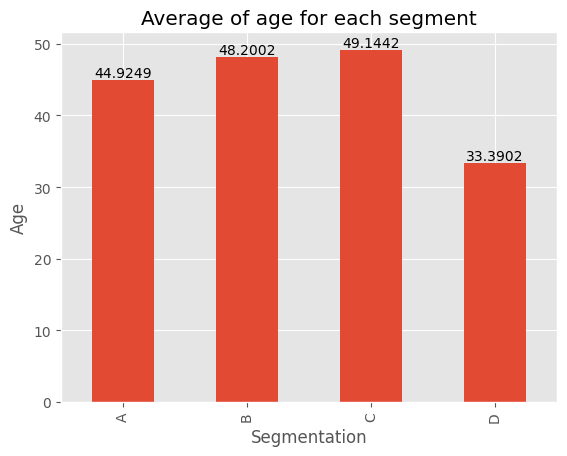

In [261]:
fig, ax = plt.subplots()
pivot_table_age_average.plot(kind='bar',ax=ax)
plt.xlabel('Segmentation')
plt.ylabel('Age')
plt.title('Average of age for each segment')
for numbers in ax.containers:
    ax.bar_label(numbers)
ax.legend().remove()
plt.show()

- We can also find the most frequent age (mode) in each segmentation

In [262]:
pivot_table_age_mode = df.pivot_table(index='Segmentation', values='Age', aggfunc=lambda x: x.mode().values[0])
pivot_table_age_mode

,Age
Segmentation,
A,35
B,43
C,50
D,22


- Youngest segment is D with average of 33.39 and the most frequent age(mode) of 22 and oldest segment is C with 49.14 years and the most frequent age(mode) of 50

### 5-6 Marital status for each gender in each segmentation

In [263]:
pivot_gender_and_marital_each_seg = pd.pivot_table(df,index='Married',columns=['Gender','Segmentation'],aggfunc='size', fill_value=0)
pivot_gender_and_marital_each_seg

Gender       Female                Male               
Segmentation      A    B    C    D    A    B    C    D
Married                                               
No              458  283  232  734  343  196  166  873
Yes             451  578  690  225  720  801  882  436

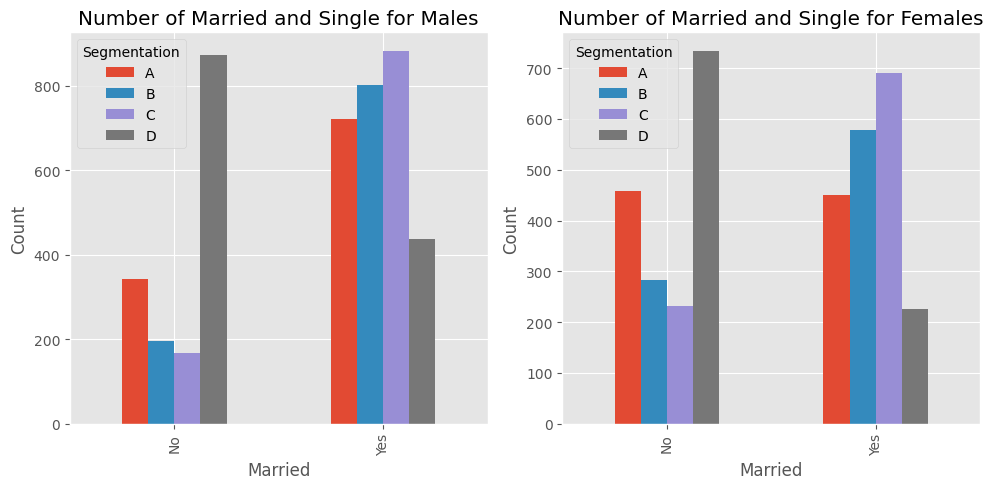

In [264]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# Males
pivot_gender_and_marital_each_seg['Male'].plot.bar(ax=axes[0])
axes[0].set_xlabel('Married')
axes[0].set_ylabel('Count')
axes[0].set_title('Number of Married and Single for Males')
# Females
pivot_gender_and_marital_each_seg['Female'].plot.bar(ax=axes[1])
axes[1].set_xlabel('Married')
axes[1].set_ylabel('Count')
axes[1].set_title('Number of Married and Single for Females')

plt.tight_layout()
plt.show()

- Most rate for single males and females and least rate for married males and females belongs to segment D and least rate for single males and females and most rate for married males and females belongs to segment C

### 5-7 Most frequent job for each segment

In [265]:
pivot_table_job_mode = df.pivot_table(index='Segmentation', columns='Profession', aggfunc='size').idxmax(axis=1)
pivot_table_job_mode

Segmentation
A        Artist
B        Artist
C        Artist
D    Healthcare
dtype: object

- we can see in all segments Artist is the most frequent profession while segment D is the only segment with different frequent profession which is health care

### 5-8 Correlation for each segment

Correlation table - Segment D:
                     Age  WorkExperience  FamilySize
Age             1.000000       -0.078269   -0.338269
WorkExperience -0.078269        1.000000   -0.047937
FamilySize     -0.338269       -0.047937    1.000000


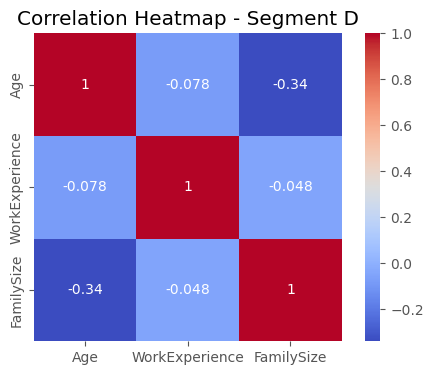

Correlation table - Segment A:
                     Age  WorkExperience  FamilySize
Age             1.000000       -0.211661   -0.162125
WorkExperience -0.211661        1.000000   -0.047227
FamilySize     -0.162125       -0.047227    1.000000


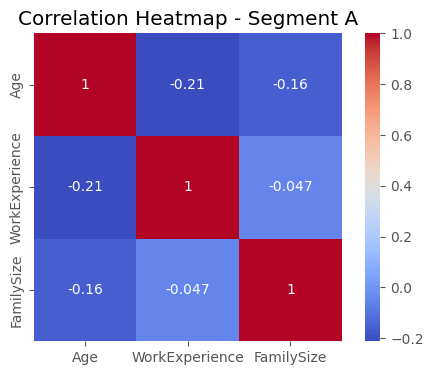

Correlation table - Segment B:
                     Age  WorkExperience  FamilySize
Age             1.000000       -0.220765   -0.182393
WorkExperience -0.220765        1.000000   -0.094205
FamilySize     -0.182393       -0.094205    1.000000


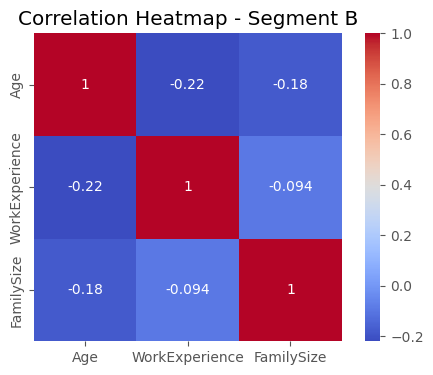

Correlation table - Segment C:
                     Age  WorkExperience  FamilySize
Age             1.000000       -0.160092   -0.267871
WorkExperience -0.160092        1.000000   -0.057137
FamilySize     -0.267871       -0.057137    1.000000


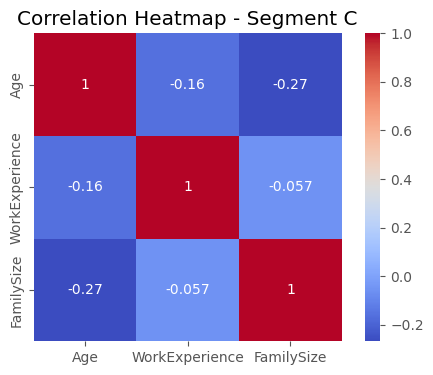

In [266]:
for segment in segments:
    segment_data = df[df['Segmentation'] == segment]
    numeric_columns = segment_data.select_dtypes(include=['int64', 'float64'])
    correlation = numeric_columns.corr()
    print(f"Correlation table - Segment {segment}:")
    print(correlation)
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
    plt.title(f"Correlation Heatmap - Segment {segment}")
    plt.show()

### 5-9 Average of family size for each segmentation

In [267]:
pivot_table_avg_family_size = df.pivot_table(index='Segmentation', values='FamilySize', aggfunc='mean')
pivot_table_avg_family_size

,FamilySize
Segmentation,
A,2.446755
B,2.696448
C,2.971574
D,3.208995


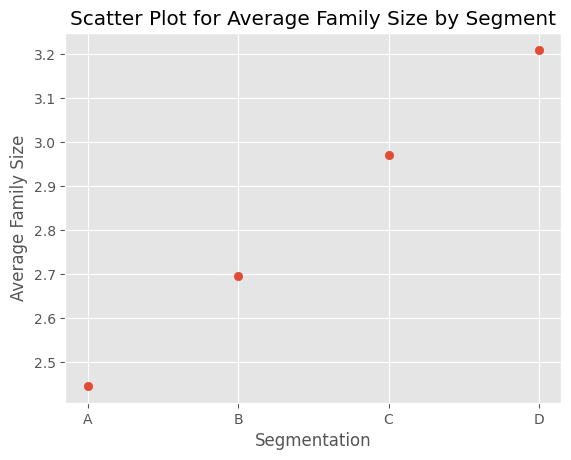

In [268]:
plt.scatter(pivot_table_avg_family_size.index, pivot_table_avg_family_size['FamilySize'])
plt.xlabel('Segmentation')
plt.ylabel('Average Family Size')
plt.title('Scatter Plot for Average Family Size by Segment')
plt.show()

- It shows that there is a linear relation and upwarding trend in case of family size, and might have been one of the potential factors to do the segmentations.

# Conclusion

- It seems that amongst the different segmentations, the most interesting ones are D and C, those are usually in the most and least ones and could be of interest to us for further analysis. 
- If there where another variables such as sum of the amount that they had paid, for instance, it could have been possible to do the regression (Predictive) analysis and make some forecasts and evaluations. But regarding these data and it's variables, and because the general purpose is to perform a explarotary analysis we only could go further until certain points.
- Generally speaking it is possible to do some other visualizations but I tried to do most meaningful and useful ones in order to avoid overusing charts and graphs and keep the ink-ratio as down as possible, for instance, i did not find it useful to illustrate the scatterplots in most of the cases because the data points are too much and it won't be that much meaningful and by looking at such busy plots the reader may be baffled, also because most of the analysis where between a numerical and a categorical variable and i wanted to perform a comparison of metric values across different subgroups of our data found it useful to use bar charts.